Task 1 - Data Analysis and Preprocessing for fraud data


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipaddress

In [ ]:
#Data cleaning 
df = pd.read_csv("../data/raw/fraud_data.csv")

cr_df = pd.read_csv("../data/raw/Country_Region.csv") # loading country region data
df.info() # have used to see the data types i have 
num_cols = df.select_dtypes(include=["int64","float64" ]).columns #for selecting numerical and categorical columns
cat_cols = df.select_dtypes(include=["object","category"]).columns #for selecting categorical columns
print(f"Numerical columns: {num_cols}")
print(f"Categorical columns: {cat_cols}")

df[num_cols] = df[num_cols].fillna(df[num_cols].median()) # filling missing numerical values with median
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0]) # filling missing categorical values with mode

df.isnull().sum() # checking for any remaining missing values

# remove duplicates
df = df.drop_duplicates()
df.shape # checking the shape after removing duplicates

# correcting data types
df['signup_time'] = pd.to_datetime(df['signup_time']) # converting to datetime
df['purchase_time'] = pd.to_datetime(df['purchase_time'])# converting to datetime
df['purchase_value'] = pd.to_numeric(df['purchase_value'], errors='coerce')# converting to numeric
df['age'] = pd.to_numeric(df['age'], errors='coerce')# converting to numeric
cat_col = ['source', 'browser', 'sex']
df[cat_col] = df[cat_col].astype('category')#  converting to category
df['class'] = df['class'].astype(int)   # converting to int

#checking for missing and  duplicate values again
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB
Numerical columns: Index(['user_id', 'purchase_value', 'age', 'ip_address', 'class'], dtype='object')
Categorical columns: Index(['signup_time', 'purchase_time', 'device_id', 'source', 'browser',
       'sex'],
      dtype='obje

np.int64(0)

In [24]:
#Data cleaning for ip address data
ip_df = pd.read_csv("../data/raw/IpAddress_to_Country.csv") # loading ip address data
ip_df.info() # have used to see the data types i have 
num_cols = ip_df.select_dtypes(include=["int64","float64" ]).columns #for selecting numerical and categorical columns
cat_cols = ip_df.select_dtypes(include=["object","category"]).columns #for selecting categorical columns
print(f"Numerical columns: {num_cols}")
print(f"Categorical columns: {cat_cols}")

ip_df[num_cols] = ip_df[num_cols].fillna(ip_df[num_cols].median()) # filling missing numerical values with median
ip_df[cat_cols] = ip_df[cat_cols].fillna(ip_df[cat_cols].mode().iloc[0]) # filling missing categorical values with mode

ip_df.isnull().sum() # checking for any remaining missing values

# remove duplicates
ip_df = ip_df.drop_duplicates()
ip_df.shape # checking the shape after removing duplicates

#checking for missing and  duplicate values again
ip_df.isnull().sum()
ip_df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB
Numerical columns: Index(['lower_bound_ip_address', 'upper_bound_ip_address'], dtype='object')
Categorical columns: Index(['country'], dtype='object')


np.int64(0)

In [ ]:
#Data cleaning for credit card data
cr_df = pd.read_csv("../data/raw/creditcard.csv") # loading credit card data
cr_df.info() # have used to see the data types i have 
num_cols = cr_df.select_dtypes(include=["int64","float64" ]).columns #for selecting numerical and categorical columns
cat_cols = cr_df.select_dtypes(include=["object","category"]).columns #for selecting categorical columns
print(f"Numerical columns: {num_cols}")
print(f"Categorical columns: {cat_cols}")

cr_df[num_cols] = cr_df[num_cols].fillna(cr_df[num_cols].median()) # filling missing numerical values with median
cr_df.isnull().sum() # checking for any remaining missing values

# remove duplicates
cr_df = cr_df.drop_duplicates()
cr_df.shape # checking the shape after removing duplicates

#checking for missing and  duplicate values again
cr_df.isnull().sum()
cr_df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

np.int64(0)

2. Exploratory Data Analysis (EDA)

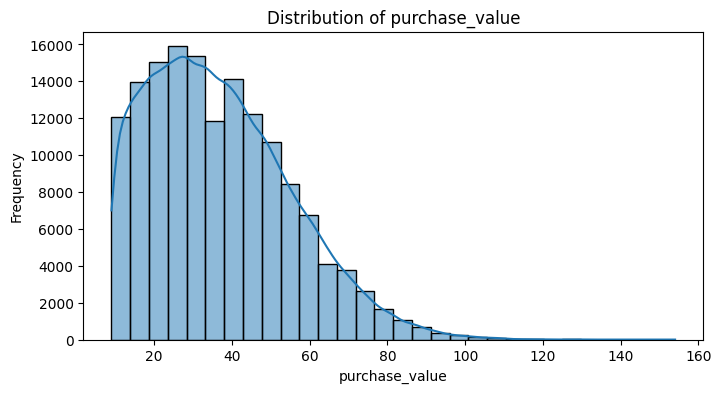

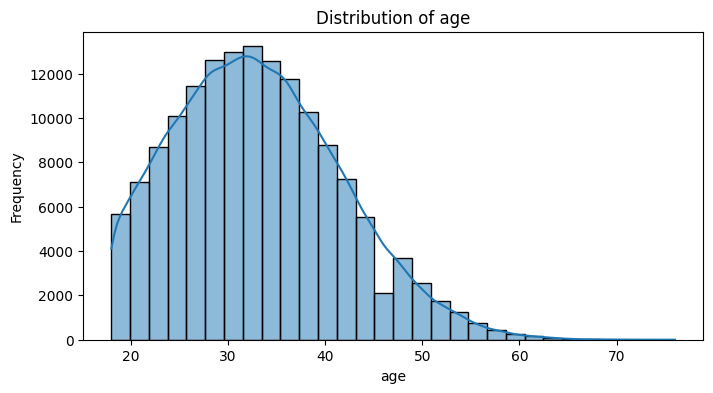

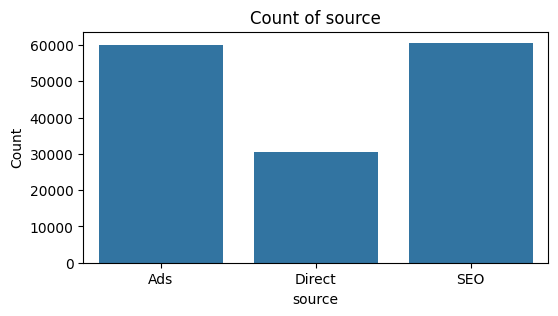

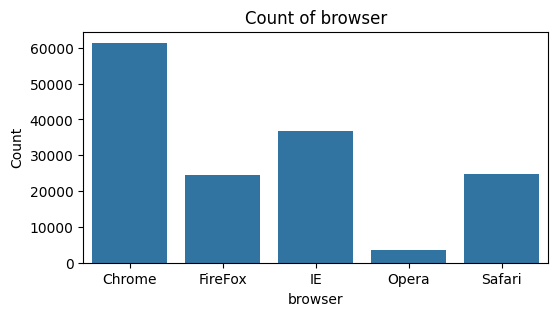

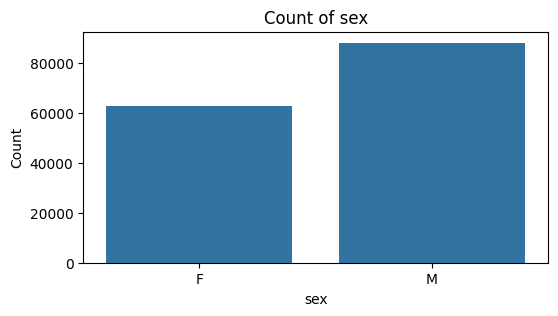

In [15]:
#Univariate analysis
num_cols = ['purchase_value', 'age'] # for my numerical columns

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

cat_cols = ['source', 'browser', 'sex'] # for my categorical columns

for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


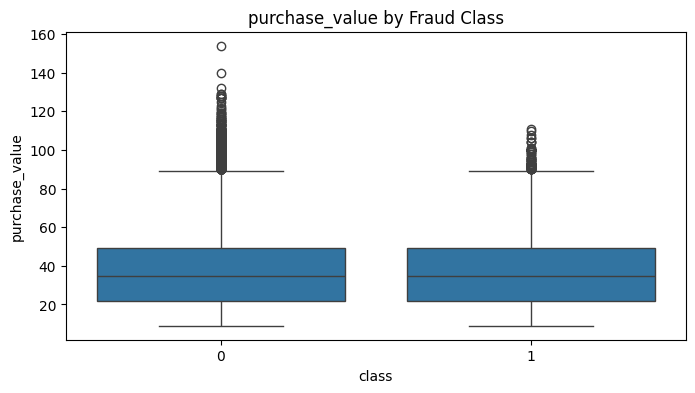

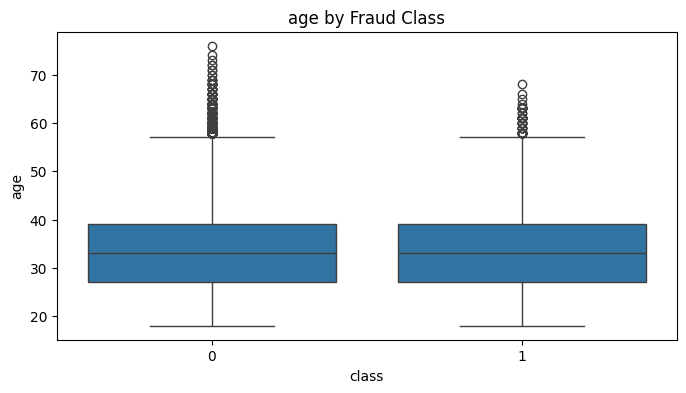

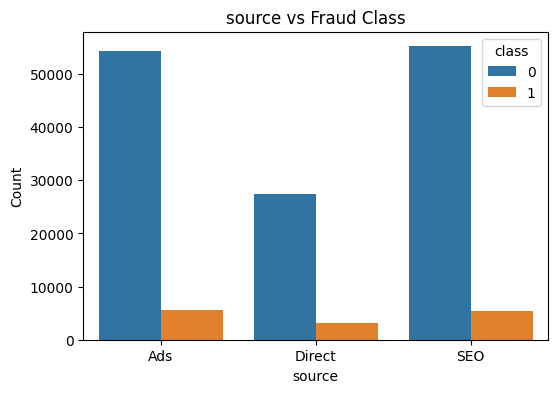

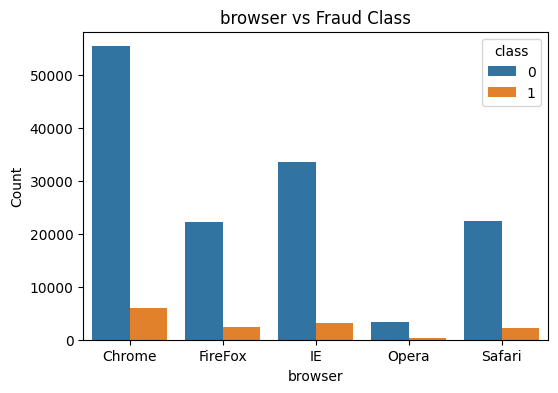

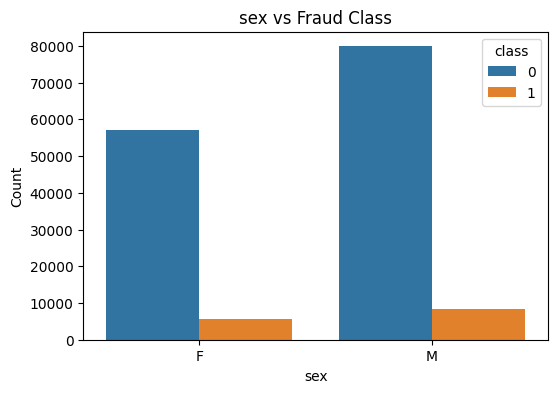

In [16]:
#Bivariate analysis
#numerical vs target
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='class', y=col, data=df)
    plt.title(f'{col} by Fraud Class')
    plt.show()
#categorical vs target
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='class', data=df)
    plt.title(f'{col} vs Fraud Class')
    plt.ylabel('Count')
    plt.show()


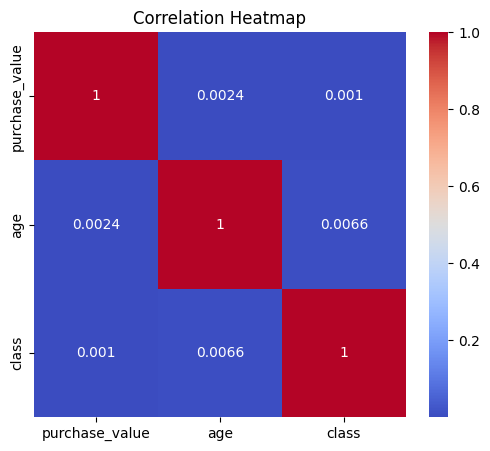

In [17]:
#correlation analysis
plt.figure(figsize=(6,5))
sns.heatmap(df[num_cols + ['class']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


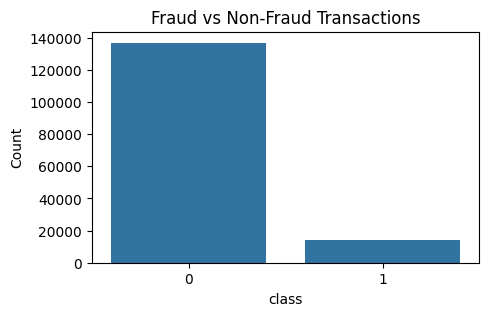

class
0    90.635423
1     9.364577
Name: proportion, dtype: float64


In [18]:
#class distribution analysis
plt.figure(figsize=(5,3))
sns.countplot(x='class', data=df)
plt.title('Fraud vs Non-Fraud Transactions')
plt.ylabel('Count')
plt.show()

# Percentage
class_percent = df['class'].value_counts(normalize=True) * 100
print(class_percent)


3.Geolocation Integration 

In [2]:
import ipaddress

# Function to convert IPv4 to integer
def ip_to_int(ip):
    try:
        return int(ipaddress.IPv4Address(ip))
    except:
        return None

# Apply to main dataset
df['ip_int'] = df['ip_address'].apply(ip_to_int)


In [4]:
ip_df = pd.read_csv('../data/raw/IpAddress_to_Country.csv')

# Convert bounds to integer
ip_df['lower_int'] = ip_df['lower_bound_ip_address'].apply(ip_to_int)
ip_df['upper_int'] = ip_df['upper_bound_ip_address'].apply(ip_to_int)


In [5]:
# Function to find country for a single IP
def find_country(ip_int):
    match = ip_df[(ip_df['lower_int'] <= ip_int) & (ip_df['upper_int'] >= ip_int)]
    if not match.empty:
        return match['country'].values[0]
    else:
        return 'Unknown'

# Apply to dataset
df['country'] = df['ip_int'].apply(find_country)


In [6]:
# Count of transactions per country
country_counts = df['country'].value_counts()

# Count of fraudulent transactions per country
fraud_counts = df[df['class'] == 1]['country'].value_counts()

# Fraud rate per country
fraud_rate = (fraud_counts / country_counts).fillna(0)


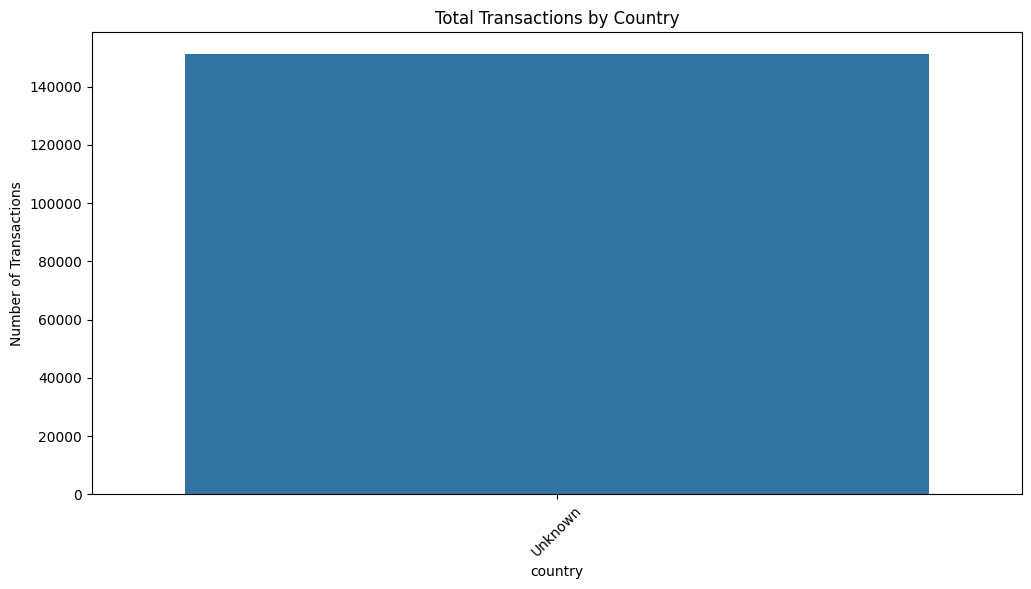

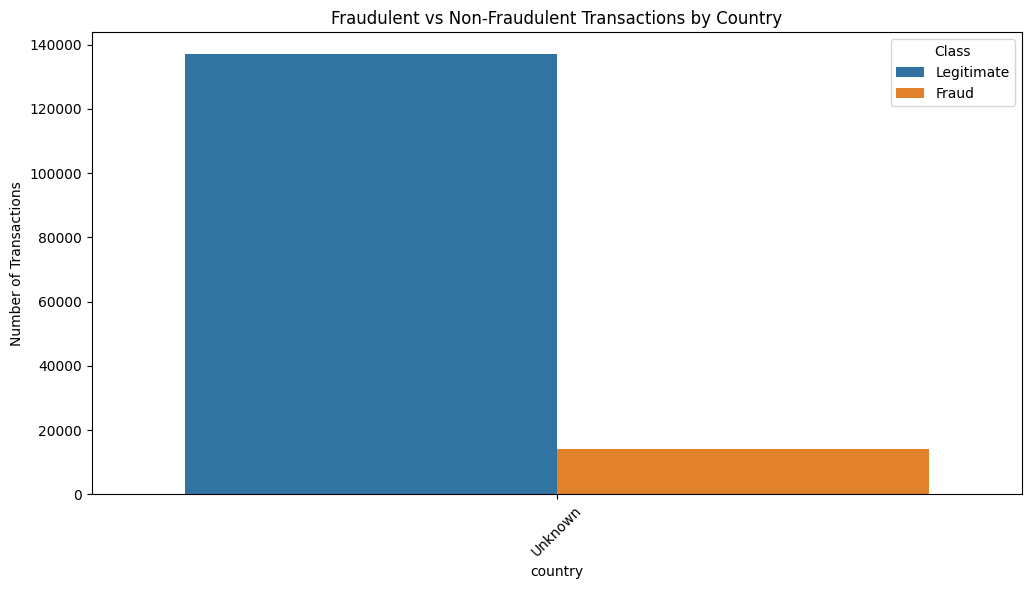

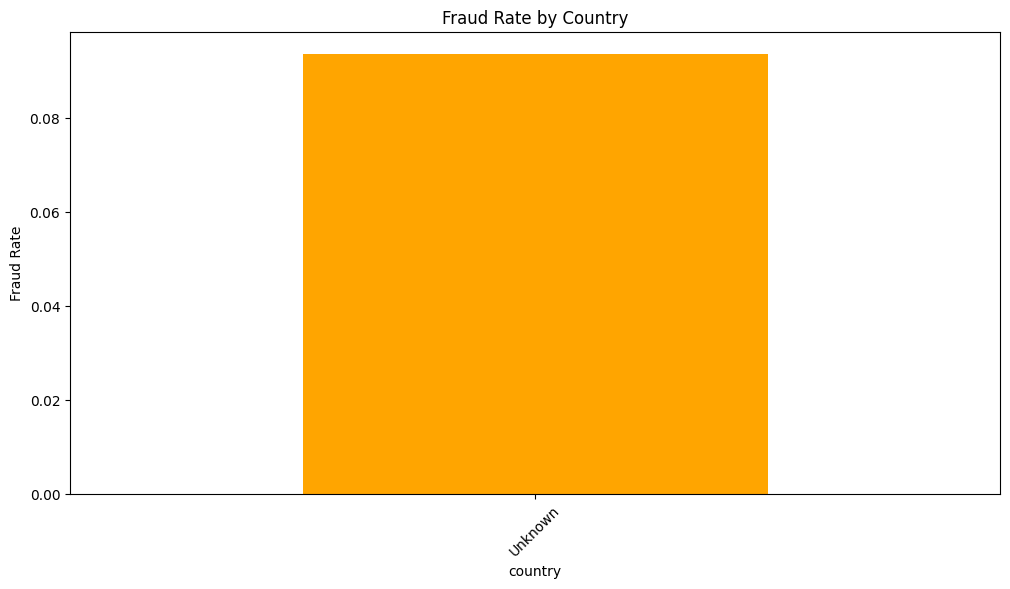

In [7]:
# Total transactions
plt.figure(figsize=(12,6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.xticks(rotation=45)
plt.title('Total Transactions by Country')
plt.ylabel('Number of Transactions')
plt.show()

# Fraudulent vs Non-Fraudulent
plt.figure(figsize=(12,6))
sns.countplot(x='country', hue='class', data=df, order=df['country'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Fraudulent vs Non-Fraudulent Transactions by Country')
plt.ylabel('Number of Transactions')
plt.legend(title='Class', labels=['Legitimate','Fraud'])
plt.show()

# Fraud rate per country
plt.figure(figsize=(12,6))
fraud_rate.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.xticks(rotation=45)
plt.title('Fraud Rate by Country')
plt.ylabel('Fraud Rate')
plt.show()
